In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [43]:
df=pd.read_csv('iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


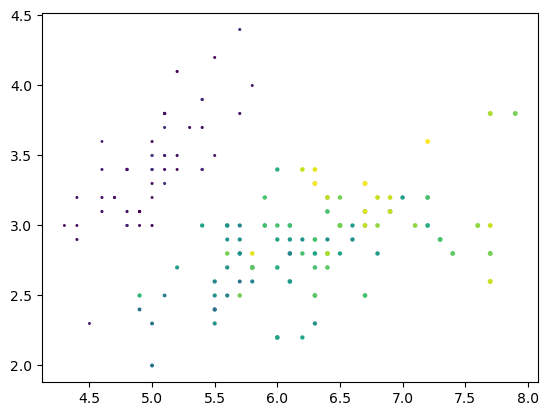

In [44]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'],df['PetalLengthCm'],df['PetalWidthCm'])
plt.show()

In [61]:
x = df.iloc[:, [0, 1, 2, 3]].values
wcss=[]
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', 
                     max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


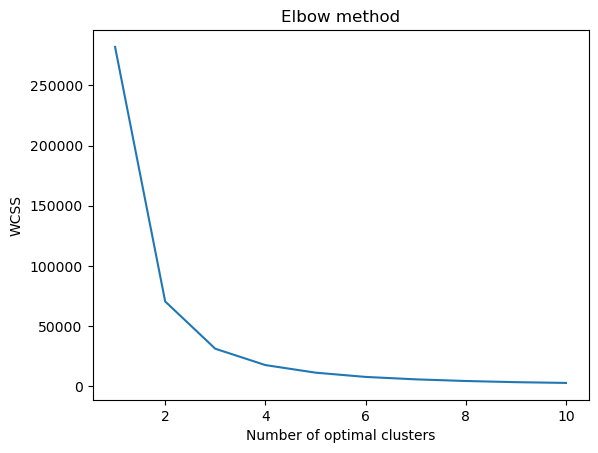

In [62]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of optimal clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
kmeans=KMeans(n_clusters=3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
predicted=kmeans.fit_predict(x)

In [69]:
kmeans.cluster_centers_

array([[ 25.5  ,   5.006,   3.418,   1.464],
       [125.5  ,   6.588,   2.974,   5.552],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

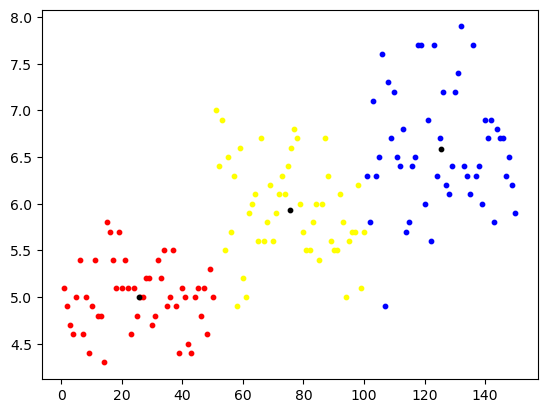

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


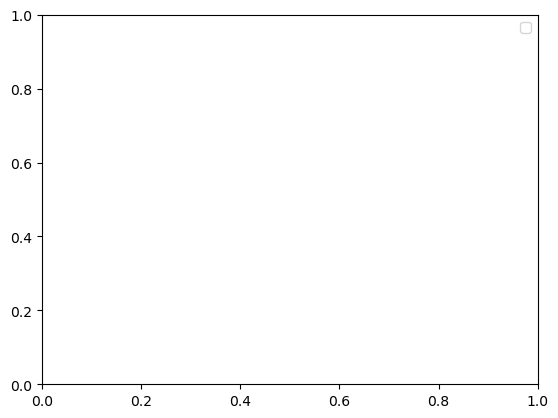

In [70]:
plt.scatter(x[predicted == 0, 0], x[predicted == 0, 1], 
            s = 10, c = 'red', label = 'Iris setosa')
plt.scatter(x[predicted == 1, 0], x[predicted == 1, 1], 
            s = 10, c = 'blue', label = 'Iris versicolour')
plt.scatter(x[predicted == 2, 0], x[predicted == 2, 1],
            s = 10, c = 'yellow', label = 'Iris virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 10, c = 'black', label = 'Centroids')

plt.show()
plt.legend()